# Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

# Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

# Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

# Data Dictionary

1. CustomerId: Unique ID which is assigned to each customer

2. Surname: Last name of the customer 

3. CreditScore: It defines the credit history of the customer.  

4. Geography: A customer’s location    

5. Gender: It defines the Gender of the customer 

6. Age: Age of the customer   

7. Tenure: Number of years for which the customer has been with the bank

8. NumOfProducts: It refers to the number of products that a customer has purchased through the bank.

9. Balance: Account balance

10. HasCrCard: It is a categorical variable that decides whether the 11. customer has a credit card or not.

11. EstimatedSalary: Estimated salary 

12. isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

13. Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )




In [815]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.8.0'

In [816]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [817]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.0 Import necessary libraries

In [818]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import pyplot
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
from collections import Counter
from keras import callbacks
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from random import shuffle
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import warnings
warnings.filterwarnings("ignore")

# Reading Dataset and Feature Elimination

## 1.1 Load the dataset

In [819]:

data = pd.read_csv('/content/drive/MyDrive/Churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


## 1.2 Checking the shape of the dataset

In [820]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 10000 rows and 14 columns.


In [821]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# There are 3 steps in Data Preprocessing:

#### STEP A :Data format checking:
1. Data Dimensioning
2. Checking the Data types

## 1.3A Checking the length of the dataset ()

In [822]:
len(data)

10000

## 1.4A To view first 5 rows of the dataset

In [823]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


## 1.5A To view the last 5 rows of the dataset

In [824]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


# checking datatypes and number of non-null values for each column


In [825]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Observations
1. Two columns are of float type.
2. Nine(9) columns are of int type
3. Dependent variable is Exited. It is of int type.
4. Three columns are of object type.

# Lets convert the columns with an 'object' datatype into categorical variables

In [826]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer


In [827]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 986.3 KB


There are a total of 14 columns and 10000 observations in the dataset
We can see that All columns have 10000 non-null values i.e. column have no values.

In [828]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64


### Observations
1. There are 7963 existed customers.


## 1.6A To view 10 samples of the dataset

In [829]:
# let's view a sample of the data
data.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7878,7879,15760456,Eberechukwu,731,France,Female,38,10,123711.730,2,1,0,171340.680,1
3224,3225,15713463,Tate,645,Germany,Female,41,2,138881.040,1,1,0,129936.530,1
1919,1920,15739858,Otitodilichukwu,618,France,Male,56,7,0.000,1,1,1,142400.270,1
4432,4433,15751193,Nnaemeka,621,Spain,Male,33,4,0.000,2,1,1,40299.230,0
4835,4836,15590623,Kovalyov,561,Spain,Male,34,4,85141.790,2,1,1,29217.370,0
4895,4896,15589435,Davide,784,France,Male,31,7,0.000,2,1,1,143204.410,0
7269,7270,15675926,Ardis,655,Germany,Male,34,7,118028.350,1,1,0,51226.320,1
1451,1452,15684198,McDonald,551,France,Female,38,10,0.000,2,1,1,216.270,0
1742,1743,15578603,Alexeieva,584,Germany,Female,54,1,77354.370,1,0,0,138192.980,1
4628,4629,15788151,Moore,650,Spain,Male,32,1,132187.730,2,1,1,178331.360,0


In [830]:
# Let's look at the statistical summary of all the data including categorical variables
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,NaN,NaN,NaN,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,NaN,NaN,NaN,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.000,NaN,NaN,NaN,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.000,NaN,NaN,NaN,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,NaN,NaN,NaN,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,NaN,NaN,NaN,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,NaN,NaN,NaN,1.530,0.582,1.000,1.000,1.000,2.000,4.000


### Observation
1. Some columns are numeric in nature.
2. The numerical variables have different ranges.
3. There are NO missing values in the dataset.

In [831]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(exclude=np.number).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


# Observations

1. Majority of the customers are Existing Customers.
2. 32 of the customers have the surname, "Smith".
3. Most of the customers are from France.

## 1.7A checking the names of the columns in the data

## STEP B IN DATA PROCESSING-------Data Consistency:

- Checking for missing values.
- Checking for inconsistency.
- Checking for duplicate values.
- Checking for outliers.
- Checking data distribution and skewness

## 1.11B checking for missing values in the data.

In [832]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

RowNumber         0.000
CustomerId        0.000
Surname           0.000
CreditScore       0.000
Geography         0.000
Gender            0.000
Age               0.000
Tenure            0.000
Balance           0.000
NumOfProducts     0.000
HasCrCard         0.000
IsActiveMember    0.000
EstimatedSalary   0.000
Exited            0.000
dtype: float64

### Observations
There are no missing values in the dataset

## 1.12B checking if the dataset has duplicate values

In [833]:
data[data.duplicated()].count()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Observations
There are no duplicate values in the dataset

In [834]:
# Let's see unique values
cols = data.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), data[col].unique())
    print("-" * 100)

Unique values in the column 'RowNumber' are 

 [    1     2     3 ...  9998  9999 10000]
----------------------------------------------------------------------------------------------------
Unique values in the column 'CustomerId' are 

 [15634602 15647311 15619304 ... 15584532 15682355 15628319]
----------------------------------------------------------------------------------------------------
Unique values in the column 'Surname' are 

 ['Hargrave', 'Hill', 'Onio', 'Boni', 'Mitchell', ..., 'Salinas', 'Cleveland', 'Kashiwagi', 'Aldridge', 'Burbidge']
Length: 2932
Categories (2932, object): ['Abazu', 'Abbie', 'Abbott', 'Abdullah', ..., 'Zubareva', 'Zuev', 'Zuyev',
                            'Zuyeva']
----------------------------------------------------------------------------------------------------
Unique values in the column 'CreditScore' are 

 [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 

# Dropping Some Columns


In [835]:
data.drop(["RowNumber","CustomerId", "Surname"], axis=1, inplace=True)

In [836]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [837]:
# Resetting the dataframe index
data.reset_index(inplace=True, drop=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


# 1.16B Exploratory Data Analysis

### UNIVARIANT ANALYSIS For the Categorical Variables

In [838]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

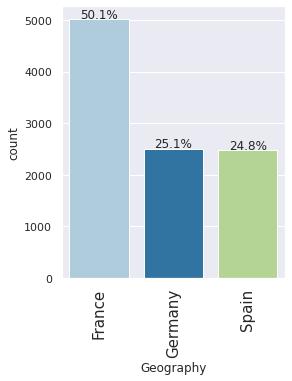

In [839]:
labeled_barplot(data, "Geography", perc=True)

# Observations.
1. 50.1% of the customers are from France.
2. 24.8% of the customers are from Spain.

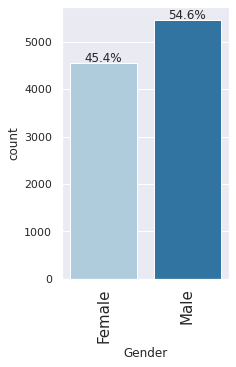

In [840]:
labeled_barplot(data, "Gender", perc=True)

There are more Male customers than female.

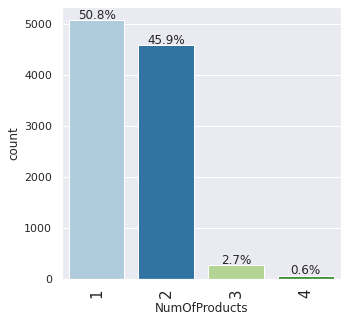

In [841]:
labeled_barplot(data, "NumOfProducts", perc=True)

# Observation

1. The number of products that Majority of the customer had purchased through the bank is 1. This might be an indication that most customers do not like to purchase products through the bank.

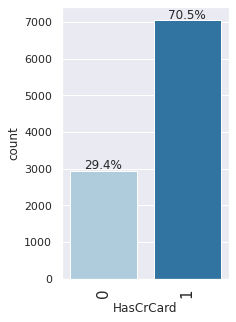

In [842]:

labeled_barplot(data, "HasCrCard", perc=True)

70.5% of the customers have a credit card. This is the majority.

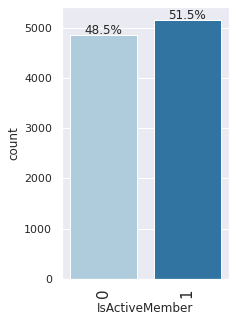

In [843]:
labeled_barplot(data, "IsActiveMember", perc=True)

1. 51.5% of the customers are active members of the bank. 
2. 48.5% of the customers are in-active members of the bank. 
The margin is very close. Nearly half of the customers are in-active.

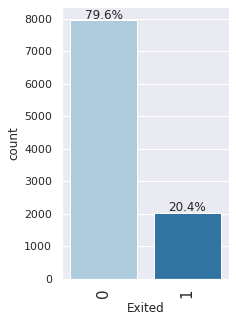

In [844]:

labeled_barplot(data, "Exited", perc=True)

79.6% of the customers did not leave the bank. Only 20.4% left the bank.  

## UNIVARIANT ANALYSIS For the Numerical Variables

In [845]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


# AGE

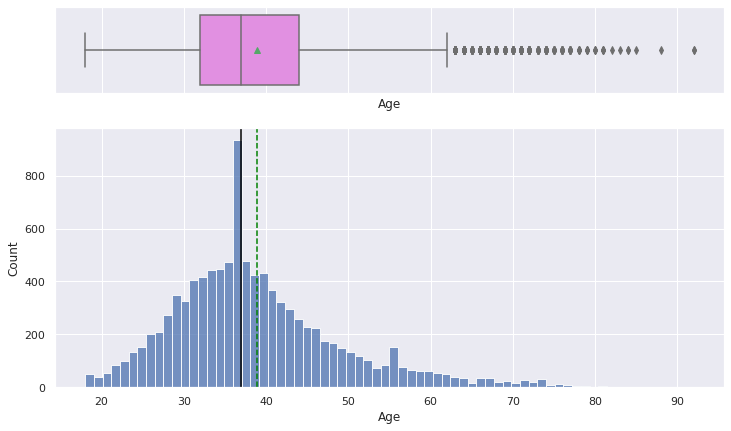

In [846]:

histogram_boxplot(data, "Age", bins=70)

Observation.
1. The [Age] of the customers are slightly skewed to the right.

# Outlier- Treatment
[Age]

In [847]:
quartiles = np.quantile(data["Age"][data["Age"].notnull()], [0.25, 0.75])
Age_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Age_4iqr}")
outlier_Age = data.loc[np.abs(data["Age"] - data["Age"].median()) > Age_4iqr, "Age"]
outlier_Age

Q1 = 32.0, Q3 = 44.0, 4*IQR = 48.0


2458    88
6443    92
6759    92
Name: Age, dtype: int64

#Observation
1. There are outliers in the data

# Tenure

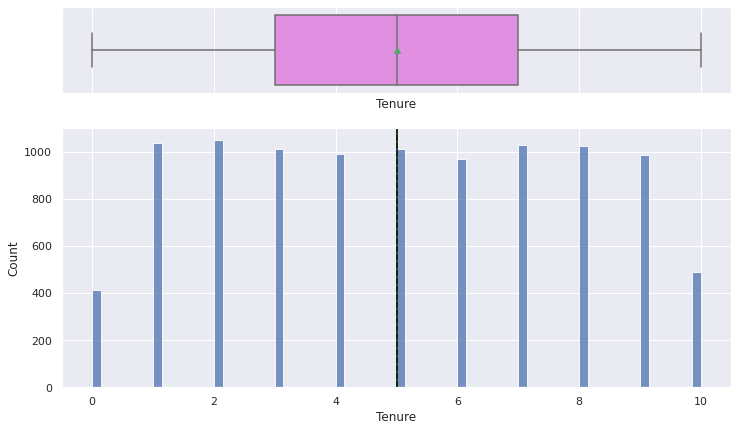

In [848]:
histogram_boxplot(data, "Tenure", bins=70)

#Observation
1. No visible outlier

CreditScore

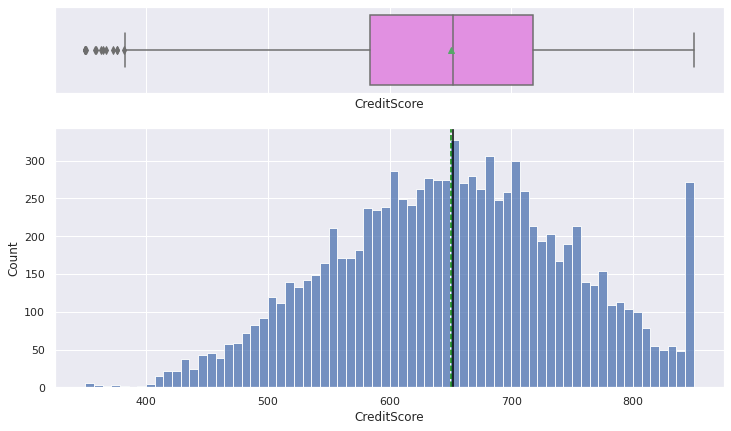

In [849]:
histogram_boxplot(data, "CreditScore", bins=70)

#Observation
1. There are visible outlier
2. Observation.
The CreditScore is very close to a normal distribution with the median and average being very close to each other.



# Outlier- Treatment

In [850]:
quartiles = np.quantile(data["CreditScore"][data["CreditScore"].notnull()], [0.25, 0.75])
CreditScore_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {CreditScore_4iqr}")
outlier_CreditScore = data.loc[np.abs(data["CreditScore"] - data["CreditScore"].median()) > Age_4iqr, "CreditScore"]
outlier_CreditScore

Q1 = 584.0, Q3 = 718.0, 4*IQR = 536.0


2       502
4       850
6       822
7       376
8       501
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 6289, dtype: int64

## Balance

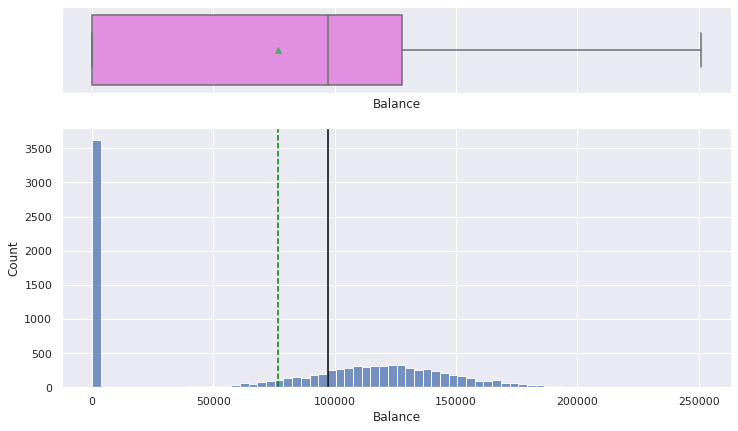

In [851]:

histogram_boxplot(data, "Balance", bins=70)

#Observation
1. No visible outlier
2. The distribution is skewed to the left.


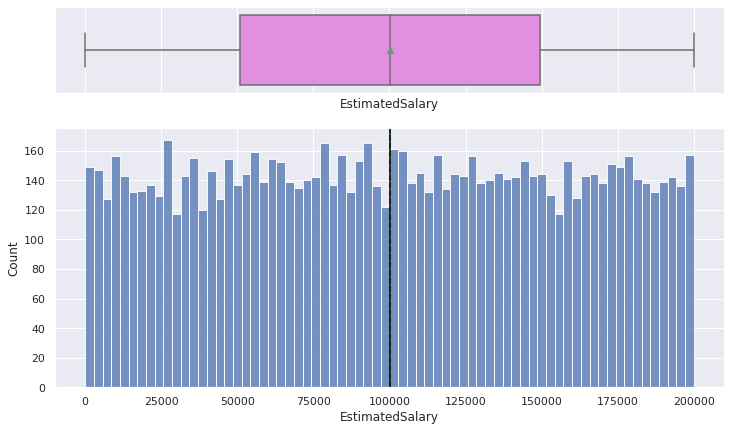

In [852]:

histogram_boxplot(data, "EstimatedSalary", bins=70)

#Observation
1. No visible outlier

# 1.17B Bivariate Analysis.

Through bivariate analysis we try to analyze two variables simultaneously. I will try to determine if there is any relationship between two variables from the dataset.

For this type of analysis, we can use use:

1. Pairplot.
2. Heatmap function in seaborn.
3. Pointplot.
4. Barplot or
5. Scatter plot.

Exploring the Relationship between numerical variables using pair plots and correlation plots.



In [853]:
# selecting numerical columns
#num_cols = data.select_dtypes(include=np.number).columns.tolist()

#for item in num_cols:
 #   histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

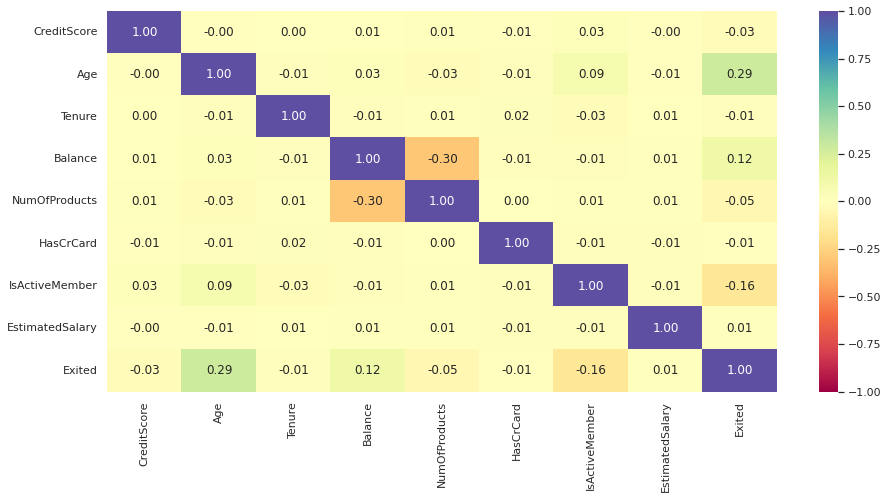

In [854]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


Observations

Avg_Credit_Limit is positively correlated with Total_Credit_Cards. The correlation is 0.61
Avg_Credit_Limit is positively correlated with Total_visits_online. The correlation is 0.55

Observations.
The Months_on_book and the Customer_Age are highly(positive) correlated. 0.79 is the correlation. So, i will drop one of the columns,
The Average_Utilization_Ratio and the Credit_Limit has a negative correlation. -0.46 is the correlation.
The Average_Utilization_Ratio and the Total_Revolving_Bal have a slightly high positive correlation. 0.62 is the correlation.

Avg_Open_To_Buy and Credit_Limit have a high positive correlation. We can drop one of them.

The Total_Trans_Ct and the Total_Trans_Amt has a very high positive correlation. 0.85 is the correlation.We can drop one of them.
The Average_Utilization_Ratio and the Avg_Open_To_Buy has a negative correlation. -0.54 is the correlation.

The Total_Ct_Chng_Q4_Q1 and the Total_Amt_Chng_Q4_Q1 has a low positive correlation. 0.38 is the correlation.
The Credit_Limit and the Total_Trans_Amt has a very low negative correlation. 0.16 is the correlation.
The Avg_Open_To_Buy and the Total_Trans_Amt has a very low correlation. 0.16 is the correlation.
The Credit_Limit and the Average_Utilization_Ratio has a very low negative correlation. -0.48 is the correlation.

# Exploring the categorical features
I will check the relationship betwwen the Target variable with some of the categorical columns in my data

In [855]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Credit Score vs Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


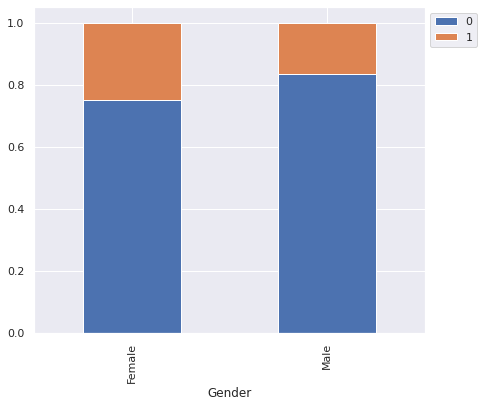

In [856]:
stacked_barplot(data, "Gender", "Exited")

There are more Male customers.
Accross both genders, the number of exited customers is high.

Geography vs Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


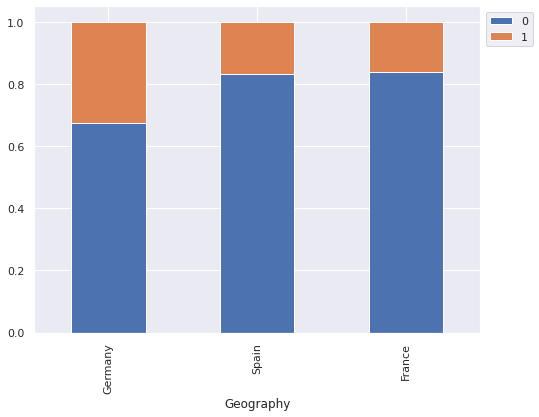

In [857]:
stacked_barplot(data, "Geography", "Exited")

 1. The % of Customers that did not leave the bank is greater than those that left the bank.

 2.  Majority of the Customers that did not leave the bank are from France.

In [858]:
data.groupby('Geography')['Exited'].sum()/2037

Geography
France    0.398
Germany   0.400
Spain     0.203
Name: Exited, dtype: float64

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


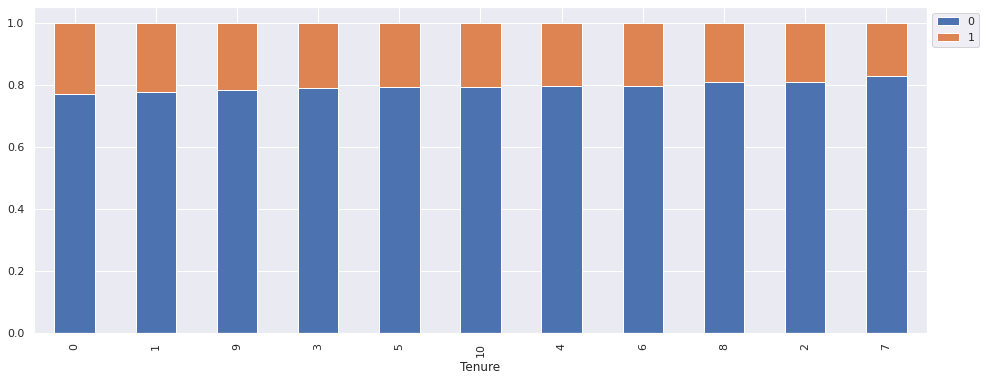

In [859]:
stacked_barplot(data, "Tenure", "Exited")

Customers with higher number of products held are more likely to use credit cards services than other customers with lesser number of products held.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


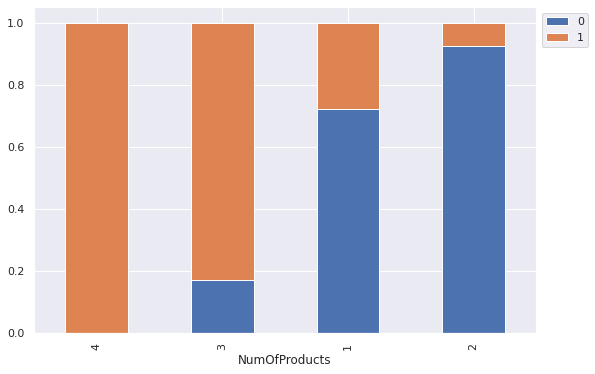

In [860]:
stacked_barplot(data, "NumOfProducts", "Exited")


The highest purchase of goods through the bank is 2 products.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


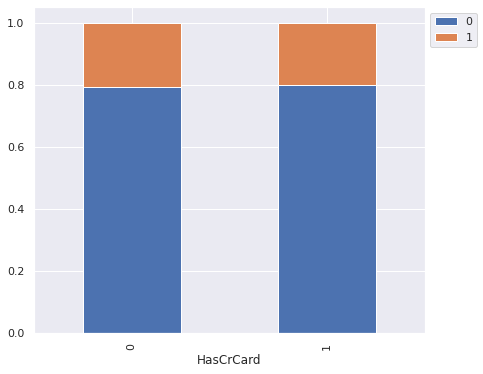

In [861]:
stacked_barplot(data, "HasCrCard", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


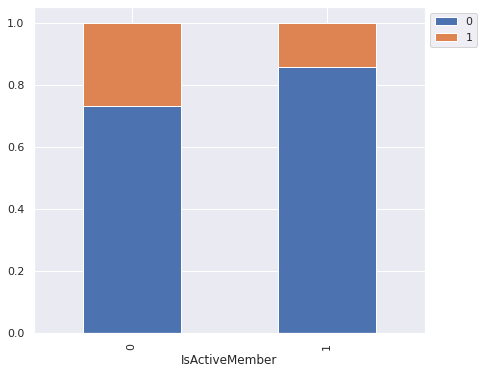

In [862]:
stacked_barplot(data, "IsActiveMember", "Exited")

 It is a categorical variable that decides whether the customer is an active member of the bank or not. There are more active members of the bank

## Storing required categorical variables in cat_dat to apply dummification 


In [863]:
cat_data = ["Gender",'IsActiveMember','HasCrCard', 'NumOfProducts','Tenure','Geography']
cat_data

['Gender',
 'IsActiveMember',
 'HasCrCard',
 'NumOfProducts',
 'Tenure',
 'Geography']

# Data Pre-processing

In [864]:
##Splitting Independent and dependent variable in X and Y respectively
data_1=data.copy()
data_1=data_1.drop(['Tenure','CreditScore','EstimatedSalary'],axis=1)
data_1=pd.get_dummies(data_mod)

X=data_1.drop('Exited',axis=1)
y=data_1['Exited']

X.head(5)

,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,42,0.000,1,1,1,1,0,0,1,0
1,41,83807.860,1,0,1,0,0,1,1,0
2,42,159660.800,3,1,0,1,0,0,1,0
3,39,0.000,2,0,0,1,0,0,1,0
4,43,125510.820,1,1,1,0,0,1,1,0


In [865]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [866]:
def get_model_predictions(model,X):
  return tf.round((model.predict(X_test)))

# Scaled Data

In [867]:
scaler=StandardScaler().fit(X_train)

In [868]:
X_train=scaler.transform(X_train)

In [869]:
X_test=scaler.transform(X_test)

# For a start, I will be using the bagging classify model

In [870]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [871]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# base_estimator for bagging classifier is a decision tree by default
bagging_estimator_model = BaggingClassifier(random_state=1)
bagging_estimator_model.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [872]:
# Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score = get_metrics_score(bagging_estimator_model, y_test)

Accuracy on test set :  0.84
Recall on test set :  0.48165869218500795
Precision on test set :  0.6608315098468271


1. This model has high accuracy. The recall score for test is very low.

2. Company would want Recall to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative.

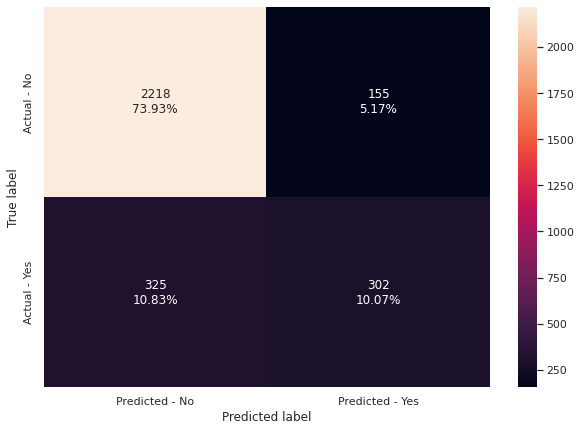

In [873]:
make_confusion_matrix(bagging_estimator_model, y_test)

# Model building for Neural networks



Three hidden layer with ReLU as activation function.
Output layer with 2 nodes (For Classification problem )

In [875]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1.add(Dense(units=16, input_dim = 10,activation='relu'))   # input of 29 columns as shown above
# hidden layer
model1.add(Dense(units=64,activation='relu'))

model1.add(Dense(32,activation='relu'))
model1.add(Dense(32,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model1.add(Dense(1,activation='sigmoid'))   

In [876]:
# Create optimizer with default learning rate
# Compile the model
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [877]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1100      
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 25)                1275      
                                                                 
 dense_12 (Dense)            (None, 1)                 26        
                                                                 
 dense_19 (Dense)            (None, 16)                32        
                                                                 
 dense_20 (Dense)            (None, 24)                408       
                                                                 
 dense_21 (Dense)            (None, 24)               

In [878]:
#fitting the model
history=model1.fit(X_train,y_train,batch_size=15,epochs=50,validation_split=0.2)

Epoch 1/50
374/374 [==============================] - 4s 6ms/step - loss: 0.5185 - accuracy: 0.7961 - val_loss: 0.5016 - val_accuracy: 0.7993
Epoch 2/50
374/374 [==============================] - 2s 5ms/step - loss: 0.5043 - accuracy: 0.7984 - val_loss: 0.5031 - val_accuracy: 0.7993
Epoch 3/50
374/374 [==============================] - 2s 5ms/step - loss: 0.5042 - accuracy: 0.7984 - val_loss: 0.5022 - val_accuracy: 0.7993
Epoch 4/50
374/374 [==============================] - 2s 5ms/step - loss: 0.5037 - accuracy: 0.7984 - val_loss: 0.5028 - val_accuracy: 0.7993
Epoch 5/50
374/374 [==============================] - 2s 5ms/step - loss: 0.5041 - accuracy: 0.7984 - val_loss: 0.5021 - val_accuracy: 0.7993
Epoch 6/50
374/374 [==============================] - 2s 5ms/step - loss: 0.5038 - accuracy: 0.7984 - val_loss: 0.5014 - val_accuracy: 0.7993
Epoch 7/50
374/374 [==============================] - 2s 6ms/step - loss: 0.5037 - accuracy: 0.7984 - val_loss: 0.5066 - val_accuracy: 0.7993
Epoch 

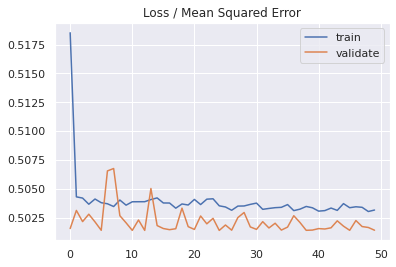

In [879]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Here the model seems to be overfitted, as the distance between the train curve and validation curve is significant.

In [880]:
model1.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7910


[0.5129885077476501, 0.7910000085830688]

Now, let's try changing the optimizer to Adam and see if we can overcome the overfitting problem.

In [881]:
   # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Model2.add(Dense(units=16, input_dim = 10,activation='relu'))   # input of 29 columns as shown above

Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=50, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/50
8/8 [==============================] - 2s 48ms/step - loss: 0.7299 - accuracy: 0.3411 - val_loss: 0.7009 - val_accuracy: 0.2007
Epoch 2/50
8/8 [==============================] - 0s 17ms/step - loss: 0.6906 - accuracy: 0.5986 - val_loss: 0.6711 - val_accuracy: 0.7993
Epoch 3/50
8/8 [==============================] - 0s 17ms/step - loss: 0.6654 - accuracy: 0.7546 - val_loss: 0.6520 - val_accuracy: 0.7993
Epoch 4/50
8/8 [==============================] - 0s 15ms/step - loss: 0.6477 - accuracy: 0.7855 - val_loss: 0.6365 - val_accuracy: 0.7993
Epoch 5/50
8/8 [==============================] - 0s 15ms/step - loss: 0.6290 - accuracy: 0.7964 - val_loss: 0.6207 - val_accuracy: 0.7993
Epoch 6/50
8/8 [==============================] - 0s 15ms/step - loss: 0.6120 - accuracy: 0.7980 - val_loss: 0.6036 - val_accuracy: 0.7993
Epoch 7/50
8/8 [==============================] - 0s 16ms/step - loss: 0.5970 - accuracy: 0.7987 - val_loss: 0.5864 - val_accuracy: 0.7993
Epoch 8/50
8/8 [===========

In [882]:
Model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_31 (Dense)            (None, 65)                715       
                                                                 
 dropout_1 (Dropout)         (None, 65)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 66        
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 dense_34 (Dense)            multiple                  130       
                                                                 
 dropout_3 (Dropout)         multiple                 

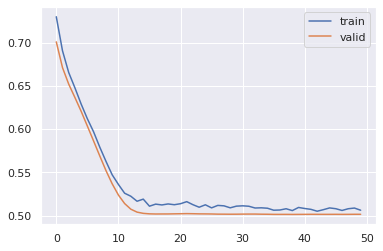

In [883]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

After Building the model with Adam Optimizer (Model-2) Early stopping, the overfitting was reduced to an extent.




In [884]:
# Using above defined function to get accuracy, recall and precision on train and test set
Model2.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7910


[0.5126290917396545, 0.7910000085830688]

# Observation

1. As you can see here the accuracy of the model increased. But we are also interested on the improvement on recall. So, let us try another Neural network

# Model-3
# BatchNormalization

In [885]:
Model4 = Sequential()




# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Model4.add(Dense(units=16, input_dim = 10,activation='relu'))   # input of 29 columns as shown above

Model4.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
Model4.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
Model4.add(BatchNormalization())
Model4.add(Dense(32, activation='relu',kernel_initializer='uniform'))
Model4.add(Dense(1, activation='sigmoid'))





Model4.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod3= Model4.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=50, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 30ms/step - loss: 0.5929 - accuracy: 0.7464 - val_loss: 0.6476 - val_accuracy: 0.7093
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.7986 - val_loss: 0.6140 - val_accuracy: 0.7471
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4325 - accuracy: 0.8259 - val_loss: 0.5876 - val_accuracy: 0.7850
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4011 - accuracy: 0.8407 - val_loss: 0.5668 - val_accuracy: 0.8071
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3809 - accuracy: 0.8471 - val_loss: 0.5469 - val_accuracy: 0.8114
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3672 - accuracy: 0.8537 - val_loss: 0.5291 - val_accuracy: 0.8129
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3568 - accuracy: 0.8545 - val_loss: 0.5162 - val_accuracy: 0.8221
Epoch 8/50
8/8 [=================

In [886]:
Model4.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 16)                176       
                                                                 
 dense_158 (Dense)           (None, 64)                1088      
                                                                 
 dense_159 (Dense)           (None, 64)                4160      
                                                                 
 batch_normalization_17 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_160 (Dense)           (None, 32)                2080      
                                                                 
 dense_161 (Dense)           (None, 1)                 33        
                                                     

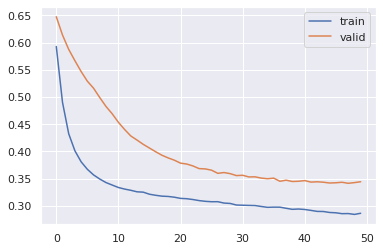

In [887]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod3.history)
hist['epoch'] = his_mod3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [888]:
# Using above defined function to get accuracy, recall and precision on train and test set
Model4.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8597


[0.3532194495201111, 0.859666645526886]

# Model5: 
Now, I am going to use Acitvations(tanh) on all hidden layers

In [889]:
Model5 = Sequential()



# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Model5.add(Dense(units=16, input_dim = 10,activation='relu'))   # input of 29 columns as shown above

Model5.add(Dense(64, kernel_initializer='he_normal', activation='tanh'))
Model5.add(Dense(64, kernel_initializer='he_normal', activation='tanh'))
Model5.add(BatchNormalization())
Model5.add(Dense(32, activation='relu',kernel_initializer='uniform'), )
Model5.add(Dense(1, activation='sigmoid'))





Model5.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod4= Model4.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=50, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/50
8/8 [==============================] - 0s 12ms/step - loss: 0.2831 - accuracy: 0.8779 - val_loss: 0.3441 - val_accuracy: 0.8514
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2836 - accuracy: 0.8775 - val_loss: 0.3430 - val_accuracy: 0.8529
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.2821 - accuracy: 0.8773 - val_loss: 0.3417 - val_accuracy: 0.8493
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.2794 - accuracy: 0.8791 - val_loss: 0.3415 - val_accuracy: 0.8550
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.2802 - accuracy: 0.8793 - val_loss: 0.3434 - val_accuracy: 0.8536
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2801 - accuracy: 0.8789 - val_loss: 0.3420 - val_accuracy: 0.8500
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.2784 - accuracy: 0.8805 - val_loss: 0.3474 - val_accuracy: 0.8529
Epoch 8/50
8/8 [===============

In [890]:
Model5.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 16)                176       
                                                                 
 dense_163 (Dense)           (None, 64)                1088      
                                                                 
 dense_164 (Dense)           (None, 64)                4160      
                                                                 
 batch_normalization_18 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_165 (Dense)           (None, 32)                2080      
                                                                 
 dense_166 (Dense)           (None, 1)                 33        
                                                     

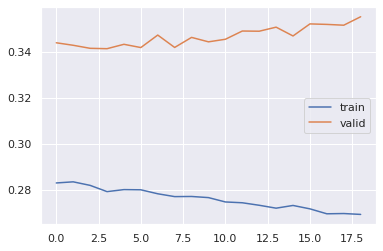

In [891]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod4.history)
hist['epoch'] = his_mod4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [892]:
# Using above defined function to get accuracy, recall and precision on train and test set
Model5.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7910


[0.6026077270507812, 0.7910000085830688]

The gap between both the loss curves is very high when compared to the previous model. This is an overfitted model.



# Model6
### Let us build one more model with relu and tanh interchangeably.

In [893]:
Model6 = Sequential()



# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
Model6.add(Dense(units=16, input_dim = 10,activation='relu'))   # input of 29 columns as shown above

Model6.add(Dense(64, kernel_initializer='he_normal', activation='tanh'))
Model6.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
Model6.add(BatchNormalization())
Model6.add(Dense(32, activation='tanh',kernel_initializer='uniform'), )
Model6.add(Dense(1, activation='sigmoid'))



Model6.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod5= Model6.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=50, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 0.6598 - accuracy: 0.6123 - val_loss: 0.6730 - val_accuracy: 0.6071
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5993 - accuracy: 0.7043 - val_loss: 0.7089 - val_accuracy: 0.5236
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5508 - accuracy: 0.7527 - val_loss: 0.6893 - val_accuracy: 0.5843
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5080 - accuracy: 0.7879 - val_loss: 0.6457 - val_accuracy: 0.6836
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4679 - accuracy: 0.8164 - val_loss: 0.5816 - val_accuracy: 0.7964
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4327 - accuracy: 0.8321 - val_loss: 0.5290 - val_accuracy: 0.8250
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4029 - accuracy: 0.8423 - val_loss: 0.4888 - val_accuracy: 0.8450
Epoch 8/50
8/8 [=================

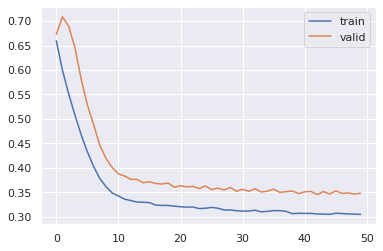

In [894]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod5.history)
hist['epoch'] = his_mod5.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [895]:
# Using above defined function to get accuracy, recall and precision on train and test set
Model6.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8530


[0.3573685586452484, 0.8529999852180481]

Model Comparison

In [896]:
get_metrics_score(Model6,y_test,flag=False)

[0.853, 0.4800637958532695, 0.7235576923076923, 0.5771812080536912]

Comments
1. 5 different models with some changes in architecture and Optimizer.
2. Model 1 and 2 produced the best recalls. Hence, i choose my model 2 as the best neural network. It has the best recall and accuracy value.

# Final conclusion about the analysis

1. More than 20% of the active customers left the bank.
2. More than 25% of the inactive customers left the bank.
3. About 50% of the customers  purchased product 4 through the bank.
4. About 44% of the customers  purchased product 2 through the bank.

